In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import SubsetRandomSampler
import sys
import os


In [4]:
#add the parent directory to the current working directory so that we can access MLP class
repository_root_directory = os.path.dirname(os.getcwd())
rrd = "repository_root_directory:\t"
print(rrd, repository_root_directory)

if repository_root_directory not in sys.path:
    sys.path.append(repository_root_directory)
    print(rrd, "added to path")
else:  
    print(rrd, "already in path")

#add the parent directory to the current working directory so that we can access MLP class
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    print(rrd, "added to path")
else:  
    print(rrd, "already in path")




repository_root_directory:	 c:\Users\cengl\Documents\CSC 461\code\csc_461_fp
repository_root_directory:	 already in path
repository_root_directory:	 already in path


cuda status:  cuda
repository_root_directory:	 c:\Users\cengl\Documents\CSC 461\code\csc_461_fp
repository_root_directory:	 already in path
shape of train:  [700,torch.Size([128, 30]),  torch.Size([128])] shape of validation:  [torch.Size([150, 30]),  torch.Size([150])] shape of test:  [torch.Size([150, 30]),  torch.Size([150])]
Epoch 0, training Loss 2.6557272802080427, training Accuracy 0.0855034738779068, validation loss 2.262288808822632, validation accuracy 0.1133333370089531
Epoch 1, training Loss 2.2997701208932058, training Accuracy 0.07690972089767456, validation loss 2.271228551864624, validation accuracy 0.1133333370089531
Epoch 2, training Loss 2.2935071086883543, training Accuracy 0.09036459028720856, validation loss 2.270235061645508, validation accuracy 0.1133333370089531
Epoch 3, training Loss 2.2704613127027238, training Accuracy 0.09609375894069672, validation loss 2.2256059646606445, validation accuracy 0.13333334028720856
Epoch 4, training Loss 2.2297635786873955, t

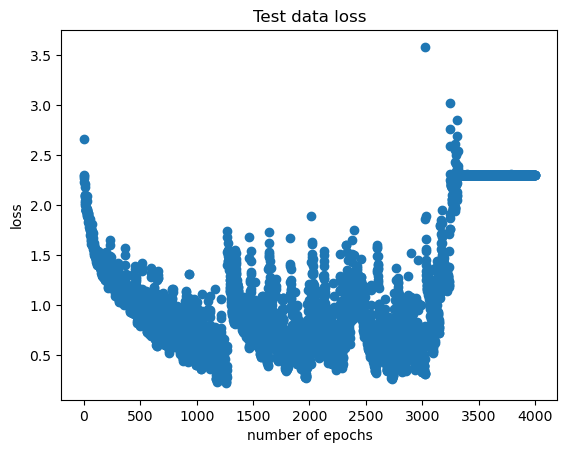

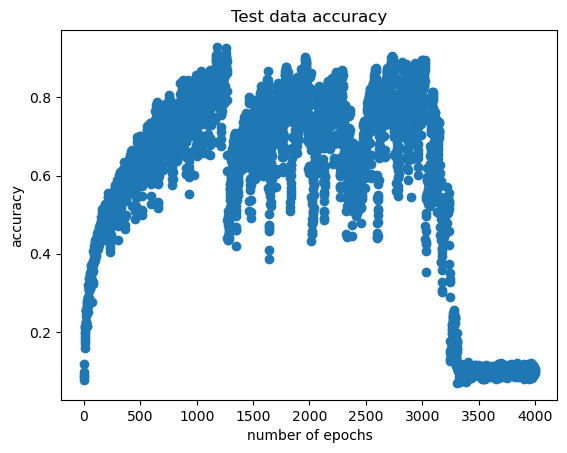

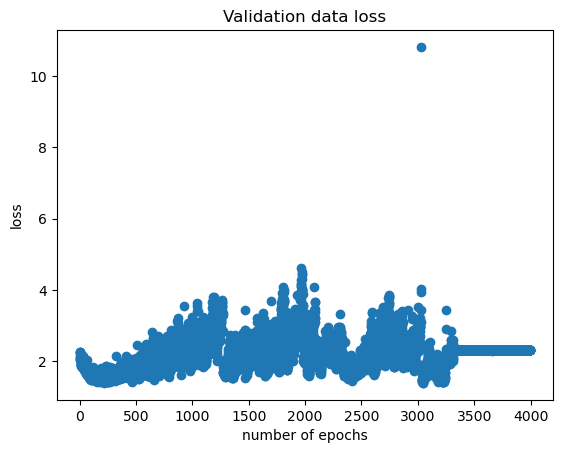

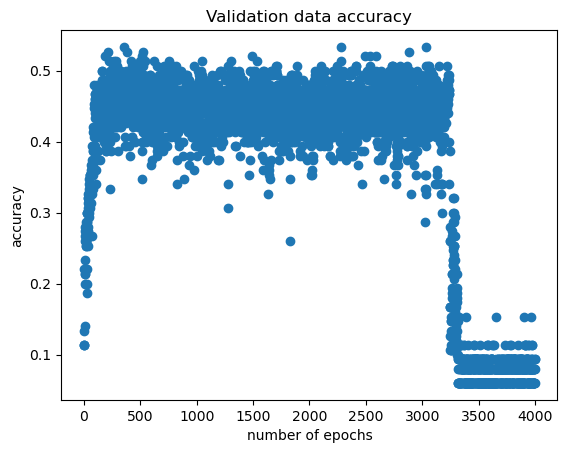

avgLoss:  2.3209543228149414
avgAccuracy:  0.08666666666666667


In [11]:

#import the class
from mlp import MLP


#check to see if cuda is avalable
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("cuda status: ", device)

#create a configuration dictionary. input size is the number of features in each sample
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [512, 512, 256, 256, 128, 128, 64, 64, 32, 32],
    'batch_size': 128,
    'n_epochs': 4000,
    'learning_rate': 0.0033
}

model = MLP(config['input_size'], config['output_size'], config['hidden_layers']).to(device)
#define criterion and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])


trainData, validData, testData =  model.load_model_dataset(config['batch_size'])
trainedData = model.train_model(model,criterion, optimizer, trainData, validData, config['n_epochs'], device)


avgLoss, avgAccuracy = model.test_model(model,criterion, testData, device)


#create the scatter plot for the test and validation data
#using the .item() to extract the float from the tensor
datasetTrainedAccuracy = [t.item() for t in trainedData[1]]
datasetValidationAccuracy = [t.item() for t in trainedData[3]]

#test data scatter plot for loss
epochList = list(range(config['n_epochs']))
plt.scatter(epochList, trainedData[0])
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.title("Test data loss")
plt.show()

#test data for scatter plot for accuracy
plt.scatter(epochList, datasetTrainedAccuracy)
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.title("Test data accuracy")
plt.show()

#Validation data for scatter plot for loss
plt.scatter(epochList, trainedData[2])
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.title("Validation data loss")
plt.show()

#validation data for scatter plot for accuracy
plt.scatter(epochList, datasetValidationAccuracy)
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.title("Validation data accuracy")
plt.show()

#test loss and accuracy
print("avgLoss: ", avgLoss)
print("avgAccuracy: ", avgAccuracy)

In [12]:
#save the model for later use
torch.save(model.state_dict(), 'model8.pth')

#results of model2.
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [256,128],
    'batch_size': 129,
    'n_epochs': 2000,
    'learning_rate': 0.0001
}

Test and validation accuracy
Epoch 0, training Loss 71.1811282043457, training Accuracy 0.08344544470310211, validation loss 63.7036018371582, validation accuracy 0.09000000357627869
Epoch 1999, training Loss 0.6834888353347778, training Accuracy 0.7685309648513794, validation loss 2.1435532569885254, validation accuracy 0.4320000112056732


Test accuracy
avgLoss:  1.7446235418319702
avgAccuracy:  0.48



#results of model3
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [256,128],
    'batch_size': 250,
    'n_epochs': 2000,
    'learning_rate': 0.005
}

Test and validation accuracy
Epoch 0, training Loss 302.3799743652344, training Accuracy 0.09600000083446503, validation loss 194.10205078125, validation accuracy 0.1080000028014183
Epoch 1999, training Loss 2.280486583709717, training Accuracy 0.14000000059604645, validation loss 2.3257501125335693, validation accuracy 0.08800000697374344

Test accuracy
avgLoss:  2.3226983547210693
avgAccuracy:  0.092

#result of model4
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [256,128],
    'batch_size': 128,
    'n_epochs': 2000,
    'learning_rate': 0.002
}

Test and validation accuracy
Epoch 0, training Loss 183.05806726074218, training Accuracy 0.06384477019309998, validation loss 194.17068481445312, validation accuracy 0.09400000423192978
Epoch 1999, training Loss 1.445132908821106, training Accuracy 0.3961321711540222, validation loss 2.3366165161132812, validation accuracy 0.2980000078678131

test accuracy
avgLoss:  2.463930368423462
avgAccuracy:  0.316

#result of model5
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [256,64],
    'batch_size': 64,
    'n_epochs': 2000,
    'learning_rate': 0.01
}

Test and validation accuracy
Epoch 0, training Loss 345.5517263183594, training Accuracy 0.09105603396892548, validation loss 386.02288818359375, validation accuracy 0.11000000685453415
Epoch 1999, training Loss 2.2915020294189454, training Accuracy 0.11961206793785095, validation loss 2.3260295391082764, validation accuracy 0.08000000566244125

test accuracy
avgLoss:  2.3130667209625244
avgAccuracy:  0.12

#result of model6
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [256,64],
    'batch_size': 64,
    'n_epochs': 30,
    'learning_rate': 0.001
}
test and validation accuracy 
Epoch 0, training Loss 97.10317614746094, training Accuracy 0.08836206793785095, validation loss 63.0863037109375, validation accuracy 0.09400000423192978

Epoch 29, training Loss 2.410719797134399, training Accuracy 0.25835129618644714, validation loss 2.2820842266082764, validation accuracy 0.27800002694129944

test accuracy
avgLoss:  2.320624351501465
avgAccuracy:  0.256

#result of model7
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [512, 512, 256, 256, 128, 128, 64, 64, 32, 32],
    'batch_size': 128,
    'n_epochs': 100,
    'learning_rate': 0.0033
}

avgLoss:  1.8606083393096924
avgAccuracy:  0.3466666666666667

#result of model8
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [512, 512, 256, 256, 128, 128, 64, 64, 32, 32],
    'batch_size': 128,
    'n_epochs': 4000,
    'learning_rate': 0.0033
}
test and validation accuracy
Epoch 0, training Loss 2.6557272802080427, training Accuracy 0.0855034738779068, validation loss 2.262288808822632, validation accuracy 0.1133333370089531
test accuracy
avgLoss:  2.3209543228149414
avgAccuracy:  0.08666666666666667